# Neural Network Assignment
## Forest fires data
Predict the burnt area of forest fires with Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

2023-05-07 09:47:09.176811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('forestfires.csv')

### Data Description
- month:	month of the year: 'jan' to 'dec'
- day:	day of the week: 'mon' to 'sun'
- FFMC:	FFMC index from the FWI system: 18.7 to 96.20
- DMC:	DMC index from the FWI system: 1.1 to 291.3
- DC:	DC index from the FWI system: 7.9 to 860.6
- ISI:	ISI index from the FWI system: 0.0 to 56.10
- temp:	temperature in Celsius degrees: 2.2 to 33.30
- RH:	relative humidity in %: 15.0 to 100
- wind:	wind speed in km/h: 0.40 to 9.40
- rain:	outside rain in mm/m2 : 0.0 to 6.4
- size_category: 	the burned area of the forest (small,large)

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


Checking null values in data

In [4]:
data.isna().sum().any()

False

Checking duplicated records in data

In [5]:
data.duplicated().sum()

8

8 duplicate records found !. Removing all duplicated records.

In [6]:
data.drop_duplicates(inplace=True)

### Data Visualization

Categorical variables

<Axes: xlabel='day', ylabel='area'>

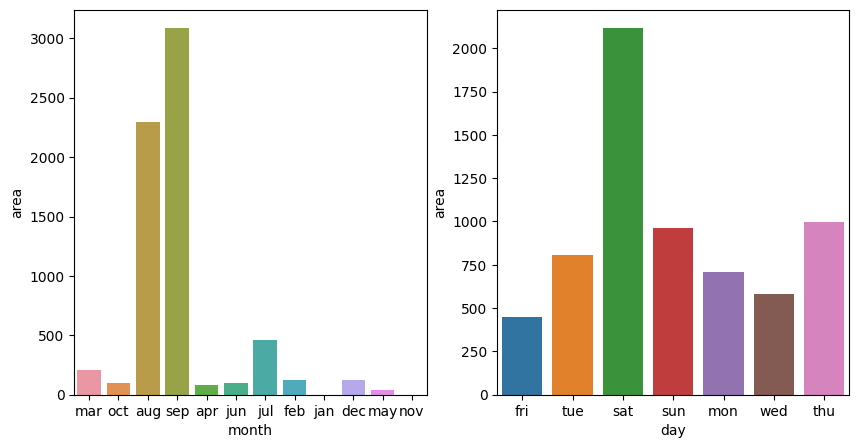

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=data,x='month',y='area',estimator='sum',errorbar=None)
plt.subplot(1,2,2)
sns.barplot(data=data,x='day',y='area',estimator='sum',errorbar=None)

Numerical variables

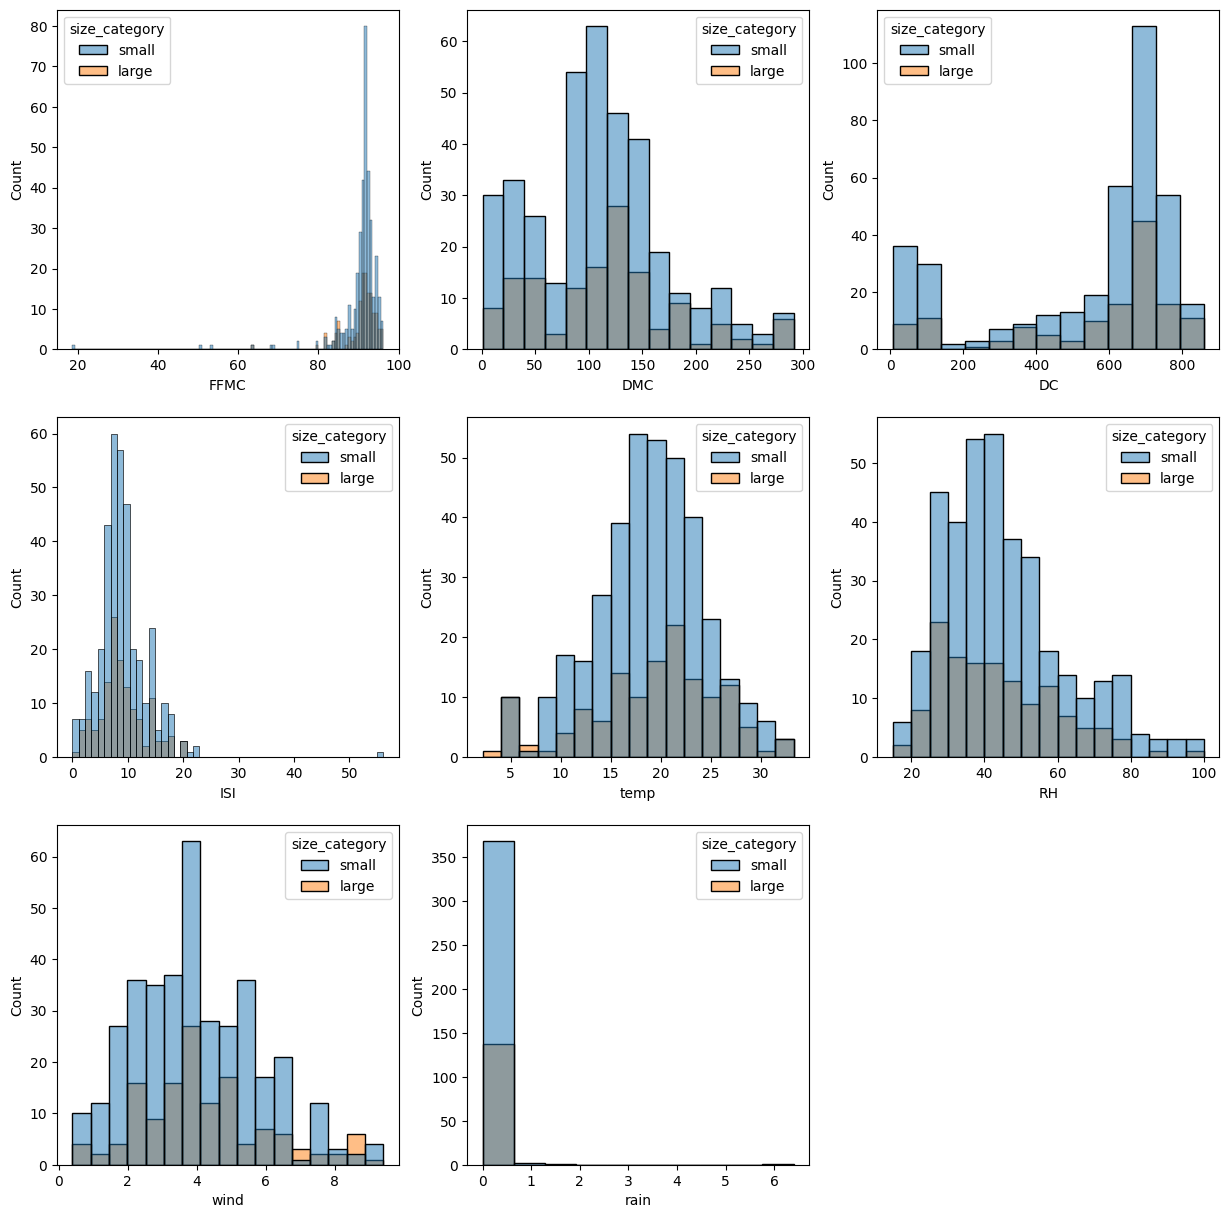

In [9]:
num_columns = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']

plt.figure(figsize=(15,15))
for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(data=data,x=num_columns[i],hue='size_category')

### Preparing data for model building

Dropping unncessary columns

In [10]:
data.drop(['month','day','size_category'], axis=1, inplace=True)

In [11]:
x = data.drop('area', axis=1)
y = data['area']

Scaling data

In [12]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [13]:
x.shape

(509, 27)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

### Model Building

In [15]:
def create_model(units=16, optimizer='adam', activation='relu', dropout_rate=0.0, num_layers=1):
    model = Sequential()
    model.add(Dense(units, input_dim=27, activation=activation))
    model.add(Dropout(dropout_rate))
    
    for i in range(num_layers):
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [16]:
param_grid = {
    'units': [8, 16, 32],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'sigmoid'],
    'dropout_rate': [0.0, 0.1, 0.2],
    'num_layers': [1, 2, 3]
}

In [17]:
model = KerasRegressor(model=create_model, verbose=0, activation='relu', dropout_rate=0.0, num_layers=1, units=8)

In [18]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 1/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=0.000 total time=   2.1s
[CV 2/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 2/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-0.409 total time=   0.6s
[CV 3/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 3/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-0.091 total time=   0.7s
[CV 4/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 4/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-0.164 total time=   0.6s
[CV 5/5; 1/108] START activation=relu, dropout_rat

In [19]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: -0.08346765974830225, using {'activation': 'sigmoid', 'dropout_rate': 0.2, 'num_layers': 3, 'optimizer': 'sgd', 'units': 16}


In [20]:
param_grid = {'batch_size':[20,40,60,80],
              'epochs':[10,20,30,40,50,60]}

In [21]:
build_model = KerasRegressor(model=create_model, verbose=0, activation='sigmoid', dropout_rate=0.1, num_layers=3, units=32, optimizer='sigmoid')

In [22]:
grid = GridSearchCV(estimator=build_model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START batch_size=20, epochs=10...................................
[CV 1/5; 1/24] END ....batch_size=20, epochs=10;, score=0.000 total time=   1.3s
[CV 2/5; 1/24] START batch_size=20, epochs=10...................................
[CV 2/5; 1/24] END ...batch_size=20, epochs=10;, score=-0.189 total time=   2.0s
[CV 3/5; 1/24] START batch_size=20, epochs=10...................................
[CV 3/5; 1/24] END ...batch_size=20, epochs=10;, score=-0.062 total time=   1.4s
[CV 4/5; 1/24] START batch_size=20, epochs=10...................................
[CV 4/5; 1/24] END ...batch_size=20, epochs=10;, score=-0.034 total time=   1.4s
[CV 5/5; 1/24] START batch_size=20, epochs=10...................................
[CV 5/5; 1/24] END ...batch_size=20, epochs=10;, score=-0.032 total time=   1.3s
[CV 1/5; 2/24] START batch_size=20, epochs=20...................................
[CV 1/5; 2/24] END ....batch_size=20, epochs=20

In [23]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: -0.03361091443870752, using {'batch_size': 80, 'epochs': 20}


<Axes: xlabel='param_epochs', ylabel='param_batch_size'>

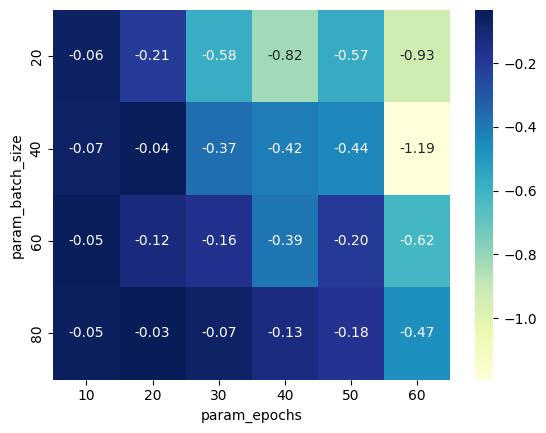

In [24]:
grid_result_df = pd.DataFrame(grid_result.cv_results_)
mean_scores = grid_result_df.pivot_table(values='mean_test_score', index='param_batch_size', columns='param_epochs')
sns.heatmap(mean_scores, cmap="YlGnBu", annot=True, fmt=".2f")

In [25]:
model = create_model(activation='sigmoid',dropout_rate=0.1, num_layers=3,optimizer='sgd',units=32)
history = model.fit(x,y,validation_split=0.2,epochs=60,batch_size=80)

Epoch 1/60
6/6 [==============================] - 1s 33ms/step - loss: 3550.7473 - val_loss: 6563.6152
Epoch 2/60
6/6 [==============================] - 0s 6ms/step - loss: 3551.8318 - val_loss: 6616.5352
Epoch 3/60
6/6 [==============================] - 0s 6ms/step - loss: 3509.8154 - val_loss: 6591.6304
Epoch 4/60
6/6 [==============================] - 0s 5ms/step - loss: 3507.8213 - val_loss: 6542.3574
Epoch 5/60
6/6 [==============================] - 0s 5ms/step - loss: 3509.2754 - val_loss: 6542.7275
Epoch 6/60
6/6 [==============================] - 0s 6ms/step - loss: 3505.6343 - val_loss: 6581.0029
Epoch 7/60
6/6 [==============================] - 0s 6ms/step - loss: 3504.8130 - val_loss: 6556.2207
Epoch 8/60
6/6 [==============================] - 0s 6ms/step - loss: 3509.3013 - val_loss: 6570.9702
Epoch 9/60
6/6 [==============================] - 0s 6ms/step - loss: 3501.7358 - val_loss: 6585.2114
Epoch 10/60
6/6 [==============================] - 0s 5ms/step - loss: 3505.9199 

Text(0, 0.5, 'Loss')

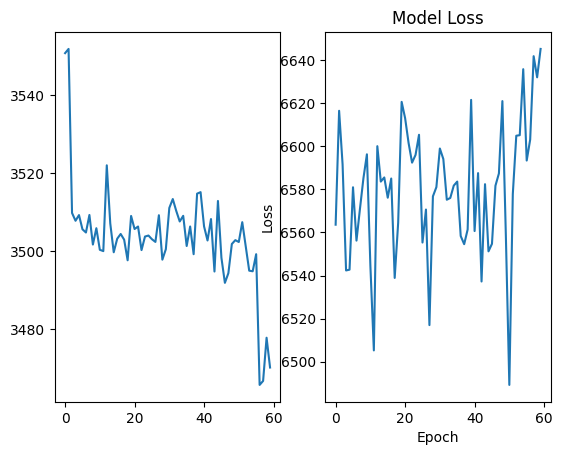

In [27]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(history.history['loss'])
ax2 = plt.subplot(1,2,2)
plt.plot(history.history['val_loss'])
ax1.set_title('training loss')
ax2.set_title('validation loss')
ax1.set_xlabel('Epoch')
ax1.set_xlabel('Epoch')
plt.ylabel('Loss')